<a href="https://colab.research.google.com/github/222luke/COMPEVOL/blob/main/C%C3%B3pia_de_PSO_Otimiza%C3%A7%C3%A3o_de_Microrrede_H%C3%ADbrida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOPSO Otimização de Microrrede Híbrida**

**Docentes:** Prof. Dr. Fernando Augusto Moreira,
              Prof. Dr. Osvaldo Soliano,
**Discente:** Gabriel Lucas Nascimento Silva

In [1]:
# === INSTALAÇÃO E IMPORTS ===
!pip install pvlib
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 54.5 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import warnings

# Supressing shapely warnings that occur on import of pvfactors
warnings.filterwarnings(action='ignore', module='pvfactors')

# Definição de localização do sistema
location = Location(latitude=-12.709714, longitude=-38.175534, tz='America/Bahia', altitude=400, name='Cimatec Park')

# Importa biblioteca dos parâmetros elétricos dos módulos fotovoltaicos e inversores do GitHub
cec_modules = pvlib.pvsystem.retrieve_sam(path='https://raw.githubusercontent.com/NREL/SAM/patch/deploy/libraries/CEC%20Modules.csv')
sapm_inverters = pvlib.pvsystem.retrieve_sam(path='https://raw.githubusercontent.com/NREL/SAM/patch/deploy/libraries/CEC%20Inverters.csv')

# Definir o modelo de módulo, inversor e ângulo
module = cec_modules['JA_Solar_JAM72S30_550_MR']
inverter = sapm_inverters['BYD_Auto_Industry_Company_Limited__BEG500KTL_U__480V_']
angulo = 14

# Usar um modelo de temperatura básico com impacto mínimo (por exemplo, NOCT)
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS["sapm"]["open_rack_glass_glass"]

# Criar o array da usina solar, definindo albedo e parâmetros de temperatura com impacto mínimo
system = PVSystem(
    name="Camacari",
    surface_tilt=angulo,
    surface_azimuth=0,
    module_parameters=module,
    inverter_parameters=inverter,
    modules_per_string=20,
    strings_per_inverter=32,
    albedo=0.2,  # Configurando a refletância do solo em 20%
    temperature_model_parameters=temperature_model_parameters
)

# Criar o bloco de parametrização da simulação
mc = ModelChain(system, location, aoi_model='no_loss', spectral_model='no_loss')

# Ler o arquivo com os dados TMY reais
tmy = pd.read_csv('/content/nrel_camacari_timestamp_updated.csv', index_col=0)
tmy.index = pd.to_datetime(tmy.index)

# Simular o modelo
mc.run_model(tmy)

# Calcular a potência em kW
pot = mc.results.ac / 1000

# Soma total de energia no período
soma_energia = pot.sum()
print(f"Soma total de energia no período: {soma_energia} kWh")


/usr/local/lib/python3.11/dist-packages/pvlib/pvsystem.py:2174: UserWarning: Original names contain 505 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/usr/local/lib/python3.11/dist-packages/pvlib/pvsystem.py:2178: UserWarning: Normalized names contain 505 duplicate(s).
  warnings.warn(


Soma total de energia no período: 661409.2519590602 kWh


In [23]:


# Dados da tabela de consumo específico (m³/kWh)
dados_consumo_especifico = {
    "Potência (kW)": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    "Motor A": [3.24, 1.92, 1.48, 1.28, 1.15, 1.04, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Motor B": [3.33, 1.85, 1.41, 1.18, 1.06, 0.96, 0.91, 0.85, 0.82, 0.78, 0.77, 0.75, 0.74, 0.72, 0.70],
    "Motor C": [np.nan, 1.92, 1.48, 1.25, 1.11, 1.02, 0.95, 0.90, 0.85, 0.83, 0.81, 0.78, np.nan, np.nan, np.nan],
    "Motor D": [4.27, 2.39, 1.75, 1.42, 1.24, 1.10, 1.01, 0.95, 0.89, 0.85, 0.81, 0.79, 0.77, 0.74, 0.73],
    "Motor E": [3.71, 2.18, 1.69, 1.42, 1.26, 1.18, 1.10, 1.04, 0.99, 0.96, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Criar o DataFrame
df_consumo = pd.DataFrame(dados_consumo_especifico)


# Dados da tabela de consumo dos motores geradores (em m³/h)
dados = {
    "Potência (kW)": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    "Motor A": [16.19, 19.18, 22.21, 25.52, 28.68, 31.16, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Motor B": [16.67, 18.53, 21.15, 23.66, 26.61, 28.84, 31.70, 34.17, 37.08, 39.03, 42.32, 44.70, 48.13, 50.05, 52.77],
    "Motor C": [16.87, 19.19, 22.21, 25.02, 27.79, 30.63, 33.19, 35.99, 38.44, 41.64, 44.72, 47.06, np.nan, np.nan, np.nan],
    "Motor D": [21.36, 23.85, 26.26, 28.42, 31.05, 32.96, 35.23, 37.84, 40.21, 42.57, 44.75, 47.52, 49.76, 51.98, 54.54],
    "Motor E": [18.54, 21.82, 25.37, 28.41, 31.60, 35.27, 38.41, 41.73, 44.65, 48.13, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Criar o DataFrame
df = pd.DataFrame(dados)


# Dados da Eficiência dos motores geradores (%)
dados_eficiencia = {
    "Potência (kW)": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    "Motor A": [5.34, 9.02, 11.69, 13.56, 15.08, 16.66, 20.91, 22.17, 22.98, 24.26, 24.61, 25.42, 25.58, 26.49, 26.97],
    "Motor B": [5.68, 10.22, 13.43, 16.01, 17.80, 19.70, 21.97, 22.17, 22.98, 22.76, 23.61, 24.12, 25.08, 25.97, 26.97],
    "Motor C": [9.87, 9.87, 12.79, 15.14, 17.04, 18.55, 19.97, 21.05, 22.17, 22.74, 23.29, 24.15, 25.10, 25.90, 27.00],
    "Motor D": [3.58, 6.42, 8.75, 10.78, 12.33, 13.43, 15.21, 16.19, 17.14, 17.99, 18.82, 19.34, 20.17, 20.62, 21.06],
    "Motor E": [5.01, 8.52, 10.99, 13.08, 14.71, 15.84, 16.94, 17.82, 18.73, 19.31, 19.91, 20.42, 20.98, 21.44, 21.90],
}

df_eficiencia = pd.DataFrame(dados_eficiencia)


In [24]:
# Parâmetros
pot_max_kw = 0     # potência sazonalfixa
carga_constante_kw = 120  # carga constante 24h
dem_min=pot_max_kw+carga_constante_kw
# Índice horário de um ano
index = pd.date_range("2025-01-01", periods=8760, freq="H")

# Inicializa carga constante 24h
carga = pd.Series(carga_constante_kw, index=index)

# Horários típicos de irrigação (manhã e tarde)
horarios_dia = list(range(5, 10)) + list(range(16, 21))

# Mascara booleana para horas de irrigação
mask_irriga = carga.index.hour.isin(horarios_dia)

# Adiciona carga irrigação nos horários definidos
carga.loc[mask_irriga] += pot_max_kw


def simular_microrrede(pot, carga, capacidade_bat,
                       df_consumo,
                       pot_motor_variavel,
                       nome_motor_fixo='Motor D',
                       pot_motor_fixo=None,
                       nome_motor_variavel='Motor B',
                       pot_max_bat=120, dod_max=0.8,
                       eta_charge=0.9, eta_discharge=0.9,
                       demanda_contratada=dem_min, preco_gas=1.80,
                       ano_inicial=2025):

    # === Tarifas e compensação (Lei 14.300) ===
    TE = 0.26128
    TUSD_FioB = 0.05939
    quota_tusd_fiob = [0.45, 0.60, 0.75, 0.90, 1.00]
    anos_ativos = [ano_inicial + i for i in range(len(quota_tusd_fiob))]
    valor_liquido_ano = {ano: TE - (1 - quota) * TUSD_FioB for ano, quota in zip(anos_ativos, quota_tusd_fiob)}

    tarifas = {
        'fora_ponta': 0.3639,
        'ponta': 3.1038
    }

    def classificar_periodo(h):
        return 'ponta' if 18 <= h.hour <= 20 else 'fora_ponta'

    def obter_cec(nome_motor, potencia_uso):
        curva = df_consumo[nome_motor].values
        potencias = df_consumo["Potência (kW)"].values
        return np.interp(potencia_uso, potencias, curva)

    if pot_motor_fixo is None:
        potencias_disponiveis = df_consumo["Potência (kW)"].values
        pot_motor_fixo = potencias_disponiveis[-1]

    # Estado inicial da bateria
    soc = 0.5 * capacidade_bat
    soc_min = capacidade_bat * (1 - dod_max)
    soc_max = capacidade_bat

    # Inicializa listas
    energia_suprida_bateria = []
    energia_comprada_rede = []
    energia_injetada_solar = []
    energia_suprida_gerador_fixo = []
    energia_suprida_gerador_var = []
    energia_solar_para_carga = []
    custo_combustivel = []
    custo_compra = []
    credito_venda = []
    soc_list = []
    demanda_rede_horaria = []

    for t in pot.index:
        hora = t.hour
        periodo = classificar_periodo(t)
        tarifa = tarifas[periodo]

        demanda = carga[t]
        pot_gerada = pot[t]
        inj_solar = 0
        comp_rede = 0
        supr_bat = 0
        supr_gerador_fixo = 0
        supr_gerador_var = 0

        # Solar atende primeiro
        solar_para_carga = min(pot_gerada, demanda)
        carga_restante = demanda - solar_para_carga
        pot_gerada_restante = pot_gerada - solar_para_carga
        energia_solar_para_carga.append(solar_para_carga)

        # Motores só operam no período noturno (18h–5h59)
        if hora >= 18 or hora < 6:
            # Motor fixo atende primeiro
            supr_gerador_fixo = min(carga_restante, pot_motor_fixo)
            carga_restante -= supr_gerador_fixo

            # Motor variável atende restante, respeitando faixa potência
            if carga_restante > 0:
                potencias_disponiveis = df_consumo["Potência (kW)"].values
                pot_min = potencias_disponiveis.min()
                pot_max = potencias_disponiveis.max()

                pot_desejada = carga_restante
                pot_uso = np.clip(pot_desejada, pot_min, pot_max)

                supr_gerador_var = pot_uso
                carga_restante -= supr_gerador_var
        else:
            # Fora do período noturno, motores desligados
            supr_gerador_fixo = 0
            supr_gerador_var = 0

        # Bateria
        if carga_restante > 0:
            energia_extraivel = min((soc - soc_min) * eta_discharge, pot_max_bat)
            supr_bat = min(carga_restante, energia_extraivel)
            soc -= supr_bat / eta_discharge
            carga_restante -= supr_bat

        # Rede
        comp_rede = carga_restante

        # Armazenar excedente solar
        if pot_gerada_restante > 0:
            energia_armazenavel = min(pot_gerada_restante * eta_charge, pot_max_bat * eta_charge)
            espaco_disp = soc_max - soc
            carga_real = min(energia_armazenavel, espaco_disp)
            soc += carga_real
            pot_gerada_restante -= carga_real / eta_charge
            inj_solar = pot_gerada_restante

        # Créditos
        valor_credito = valor_liquido_ano.get(t.year, TE)
        credito_energia = inj_solar * valor_credito

        # Consumo específico e custo combustível
        cec_fixo = obter_cec(nome_motor_fixo, supr_gerador_fixo)
        cec_var = obter_cec(nome_motor_variavel, supr_gerador_var)
        consumo_m3_fixo = supr_gerador_fixo * cec_fixo
        consumo_m3_var = supr_gerador_var * cec_var
        custo_comb = (consumo_m3_fixo + consumo_m3_var) * preco_gas

        # Armazenar resultados horários
        soc_list.append(soc)
        energia_suprida_bateria.append(supr_bat)
        energia_comprada_rede.append(comp_rede)
        energia_injetada_solar.append(inj_solar)
        energia_suprida_gerador_fixo.append(supr_gerador_fixo)
        energia_suprida_gerador_var.append(supr_gerador_var)
        custo_combustivel.append(custo_comb)
        custo_compra.append(comp_rede * tarifa)
        credito_venda.append(credito_energia)
        demanda_rede_horaria.append(comp_rede)

    # Demanda contratada e ultrapassagem
    demanda_rede_series = pd.Series(demanda_rede_horaria, index=pot.index)
    custo_demanda_contratada = 38.61 * demanda_contratada * 12
    demanda_max_mensal = demanda_rede_series.resample("ME").max()
    excedente_kw_mensal = demanda_max_mensal - demanda_contratada
    excedente_kw_mensal[excedente_kw_mensal < 0] = 0
    custo_ultrapassagem = (excedente_kw_mensal * 77.22).sum()
    custo_total_demanda = custo_demanda_contratada + custo_ultrapassagem

    return {
        "soc": pd.Series(soc_list, index=pot.index),
        "energia_suprida_bateria": pd.Series(energia_suprida_bateria, index=pot.index),
        "energia_comprada_rede": pd.Series(energia_comprada_rede, index=pot.index),
        "energia_injetada_solar": pd.Series(energia_injetada_solar, index=pot.index),
        "energia_solar_para_carga": pd.Series(energia_solar_para_carga, index=pot.index),
        "energia_suprida_gerador_fixo": pd.Series(energia_suprida_gerador_fixo, index=pot.index),
        "energia_suprida_gerador_var": pd.Series(energia_suprida_gerador_var, index=pot.index),
        "custo_combustivel": pd.Series(custo_combustivel, index=pot.index),
        "custo_compra_rede": pd.Series(custo_compra, index=pot.index),
        "credito_geracao_excedente": pd.Series(credito_venda, index=pot.index),
        "custo_demanda": custo_total_demanda,
        "capacidade_utilizada": capacidade_bat,
        "motor_fixo": nome_motor_fixo,
        "motor_variavel": nome_motor_variavel,
        "pot_motor_fixo": pot_motor_fixo,
        "pot_motor_variavel": pot_motor_variavel,
        "custo_combustivel_anual": np.sum(custo_combustivel)
    }


/tmp/ipython-input-24-1252608856.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range("2025-01-01", periods=8760, freq="H")


In [30]:
def lcoe_bateria_obj(x, pot, carga, df_consumo):
    capacidade = float(x[0])
    pot_var = float(x[1])

    if capacidade < 10 or capacidade > 500 or pot_var < 5:
        return 1e6

    nome_motor_fixo = "Motor D"
    nome_motor_var = "Motor B"

    resultado = simular_microrrede(pot, carga, capacidade,
                                   df_consumo,
                                   pot_motor_variavel=pot_var,
                                   nome_motor_fixo=nome_motor_fixo,
                                   nome_motor_variavel=nome_motor_var)

    energia_bat = resultado["energia_suprida_bateria"].sum()
    if energia_bat == 0:
        return 1e6

    capex = capacidade * 2.8
    taxa = 0.08
    n = 25
    vida_bat = 10

    fluxo_reposicoes = sum(capex / ((1 + taxa)**ano) for ano in range(vida_bat, n, vida_bat))
    opex_anual = 0.02 * capex
    fluxo_opex = sum(opex_anual / ((1 + taxa)**ano) for ano in range(1, n + 1))

    ultima_sub = max([ano for ano in range(vida_bat, n + 1, vida_bat) if ano <= n], default=0)
    vida_restante = vida_bat - (n - ultima_sub)
    salvage = capex * (vida_restante / vida_bat) if vida_restante > 0 else 0
    valor_presente_salvage = salvage / ((1 + taxa) ** n)

    vpl_total = fluxo_reposicoes + fluxo_opex - valor_presente_salvage
    crf = (taxa * (1 + taxa)**n) / ((1 + taxa)**n - 1)
    custo_anualizado = (vpl_total + capex) * crf
    return custo_anualizado / energia_bat


def lcoe_total_obj(x, pot, carga, df_consumo):
    capacidade = float(x[0])
    pot_var = float(x[1])

    if capacidade < 10 or capacidade > 500 or pot_var < 5:
        return 1e6

    nome_motor_fixo = "Motor D"
    nome_motor_var = "Motor B"

    resultado = simular_microrrede(pot, carga, capacidade,
                                   df_consumo,
                                   pot_motor_variavel=pot_var,
                                   nome_motor_fixo=nome_motor_fixo,
                                   nome_motor_variavel=nome_motor_var)

    energia_util = (
        resultado["energia_suprida_bateria"].sum() +
        resultado["energia_injetada_solar"].sum() +
        resultado["energia_solar_para_carga"].sum() +
        resultado["energia_suprida_gerador_fixo"].sum() +
        resultado["energia_suprida_gerador_var"].sum()
    )

    if energia_util == 0:
        return 1e6
    modules_per_string=20
    strings_per_inverter=32
    capex_solar = modules_per_string*strings_per_inverter*550*1.85
    capex_bat = capacidade * 2.4
    capex = capex_bat + capex_solar
    taxa = 0.08
    n = 25
    vida_bat = 10

    fluxo_reposicoes = sum(capex_bat / ((1 + taxa) ** ano) for ano in range(vida_bat, n, vida_bat))
    opex_anual = 0.02 * capex_bat + 0.02 * capex_solar
    fluxo_opex = sum(opex_anual / ((1 + taxa) ** ano) for ano in range(1, n + 1))

    ultima_sub = max([ano for ano in range(vida_bat, n + 1, vida_bat) if ano <= n], default=0)
    vida_restante = vida_bat - (n - ultima_sub)
    salvage = capex_bat * (vida_restante / vida_bat) if vida_restante > 0 else 0
    valor_presente_salvage = salvage / ((1 + taxa) ** n)

    fluxo_rede = sum(
        (resultado["custo_compra_rede"].sum() - resultado["credito_geracao_excedente"].sum()) / ((1 + taxa) ** ano)
        for ano in range(1, n + 1)
    )

    fluxo_demanda = sum(resultado["custo_demanda"] / ((1 + taxa) ** ano) for ano in range(1, n + 1))
    fluxo_combustivel = sum(resultado["custo_combustivel_anual"] / ((1 + taxa) ** ano) for ano in range(1, n + 1))

    vpl_total = capex + fluxo_reposicoes + fluxo_opex + fluxo_rede + fluxo_demanda + fluxo_combustivel - valor_presente_salvage
    crf = (taxa * (1 + taxa)**n) / ((1 + taxa)**n - 1)
    custo_anualizado = vpl_total * crf
    return custo_anualizado / energia_util



def fracao_ren_obj(x, pot, carga, df_consumo):
    capacidade = float(x[0])
    pot_var = float(x[1])

    if capacidade < 10 or capacidade > 10000 or pot_var < 5:
        return 1e6

    nome_motor_fixo = "Motor D"
    nome_motor_var = "Motor B"

    resultado = simular_microrrede(pot, carga, capacidade,
                                   df_consumo,
                                   pot_motor_variavel=pot_var,
                                   nome_motor_fixo=nome_motor_fixo,
                                   nome_motor_variavel=nome_motor_var)

    energia_solar_gerada = pot.sum()
    energia_excedente = resultado["energia_injetada_solar"].sum()
    energia_solar_util = energia_solar_gerada - energia_excedente

    energia_motores = resultado["energia_suprida_gerador_fixo"].sum() + resultado["energia_suprida_gerador_var"].sum()
    energia_renovavel_util = energia_solar_util + energia_motores
    energia_total = carga.sum()

    fracao_ren = energia_renovavel_util / energia_total
    return 1 - fracao_ren if fracao_ren >= 0 else 1e6




In [13]:
!pip install deap --quiet
import random, numpy as np, matplotlib.pyplot as plt
from deap import base, creator, tools

In [26]:
# %% 3 — Hiperparâmetros
POP_SIZE   = 20          # múltiplo de 4
N_GEN      = 50
CX_PROB    = 0.9
MUT_PROB   = 0.2
ETA_CROSS  = 15.0
ETA_MUT    = 20.0

# penalidades iniciais (ficam mais fortes a cada geração)
LAMBDA_G0  = 10_000.0     # para desigualdades
LAMBDA_H0  = 10_000.0     # para igualdade
TOL_H      = 0.01         # tolerância da igualdade

# limites das variáveis (capacidade_bateria, pot_motor_variavel)
BOUNDS = [(10, 500),    # capacidade_bat (kWh)
          (5, 75)]      # pot_motor_variavel (kW)
LOWER = [b[0] for b in BOUNDS]
UPPER = [b[1] for b in BOUNDS]

In [27]:
# %% 5 — Tipos DEAP
if "FitnessMin" not in dir(creator):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
if "Individual" not in dir(creator):
    creator.create("Individual", list, fitness=creator.FitnessMin)

# %% 6 — Toolbox
toolbox = base.Toolbox()

# Registrando atributos com limites distintos
toolbox.register("attr_capacidade", random.uniform, *BOUNDS[0])
toolbox.register("attr_pot_motor", random.uniform, *BOUNDS[1])

# Cria indivíduo com 2 genes: [capacidade_bat, pot_motor_variavel]
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_capacidade, toolbox.attr_pot_motor), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# %% 4 — Função Objetivo
def evaluate(x):
    capacidade = x[0]
    pot_motor = x[1]
    f1 = lcoe_total_obj(x, pot, carga, df_consumo)
    f2 = fracao_ren_obj(x, pot, carga, df_consumo)
    return f1, f2

toolbox.register("evaluate", evaluate)

# Crossover e mutação com limites separados para cada gene
def bounded_crossover(ind1, ind2, eta):
    for i in range(len(ind1)):
        tools.cxSimulatedBinaryBounded(ind1, ind2, low=BOUNDS[i][0], up=BOUNDS[i][1], eta=eta)
    return ind1, ind2

def bounded_mutation(ind, eta, indpb):
    for i in range(len(ind)):
        tools.mutPolynomialBounded(ind, low=BOUNDS[i][0], up=BOUNDS[i][1], eta=eta, indpb=indpb)
    return ind,

toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                 low=LOWER, up=UPPER, eta=ETA_CROSS)
toolbox.register("mutate", tools.mutPolynomialBounded,
                 low=LOWER, up=UPPER, eta=ETA_MUT, indpb=0.5)

def sanitize(individual):
    for i in range(len(individual)):
        val = individual[i]
        if isinstance(val, complex):  # evita números complexos
            val = val.real
        individual[i] = float(min(max(val, LOWER[i]), UPPER[i]))
    return individual

toolbox.register("select", tools.selNSGA2)

In [28]:
# %% 7 — Loop principal
def nsga2_run():
    pop = toolbox.population(POP_SIZE)
    penalty_stats, feasible_rate = [], []

    # Avaliar população inicial
    for ind in pop:
        ind.fitness.values = toolbox.evaluate(ind)
    pop = toolbox.select(pop, len(pop))

    for gen in range(1, N_GEN + 1):
        print(f"\rGen {gen}", end='')
        # penalidades crescem ao longo das gerações
        # Reprodução
        offspring = tools.selTournamentDCD(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for c1, c2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CX_PROB:
                toolbox.mate(c1, c2)
                del c1.fitness.values, c2.fitness.values
        for m in offspring:
            if random.random() < MUT_PROB:
                toolbox.mutate(m)
                sanitize(m)
                del m.fitness.values

        # Avaliar apenas indivíduos novos
        for ind in (i for i in offspring if not i.fitness.valid):
            ind.fitness.values = toolbox.evaluate(ind)
            print(f"Obj1: {ind.fitness.values[0]:.4f}, Obj2: {ind.fitness.values[1]:.4f}")
            print(f"Indiv: {ind}")
        # Seleção elitista NSGA‑II
        pop = toolbox.select(pop + offspring, POP_SIZE)

        # Estatísticas

        #if gen % 1 == 0 or gen == 1 or gen == N_GEN:
            #print(f"Geração {gen:3d}")

    return pop


In [31]:
# %% 8 — Execução
pareto_pop = nsga2_run()
#lcoe_total_obj(200.08,pot,carga)

Gen 1Obj1: 0.6978, Obj2: 0.1080
Indiv: [221.9821205938539, 22.60993469585955]
Obj1: 0.6938, Obj2: 0.1695
Indiv: [15.555438493912334, 7.349315055458961]
Obj1: 0.6971, Obj2: 0.1188
Indiv: [183.6231597708558, 7.54966479729922]
Obj1: 0.6941, Obj2: 0.1648
Indiv: [29.258957044205715, 69.66003788827561]
Obj1: 0.6974, Obj2: 0.1143
Indiv: [199.33460319568783, 67.72472992445833]
Obj1: 0.6956, Obj2: 0.1422
Indiv: [102.99108921623899, 11.55625608651561]
Obj1: 0.6966, Obj2: 0.1271
Indiv: [154.54364376322854, 59.721687948583984]
Obj1: 0.6953, Obj2: 0.1467
Indiv: [87.69170118261427, 23.679559557848535]
Obj1: 0.7004, Obj2: 0.0687
Indiv: [366.0175761876477, 65.92446350059012]
Obj1: 0.6982, Obj2: 0.1030
Indiv: [239.76215584207097, 14.977045828768809]
Obj1: 0.7010, Obj2: 0.0605
Indiv: [397.57193021027933, 26.975907414368752]
Obj1: 0.6968, Obj2: 0.1239
Indiv: [165.59343188212387, 70.49938530049701]
Obj1: 0.7024, Obj2: 0.0388
Indiv: [484.92095650295437, 46.74401216179678]
Obj1: 0.6988, Obj2: 0.0926
Indiv: 

In [32]:
pareto_pop

[[10.037149109372827, 12.771278238889128],
 [10.037149109372827, 12.771278238889128],
 [499.9423699955312, 26.49710753847606],
 [499.9423699955312, 26.49710753847606],
 [108.55033419080766, 12.772888752572873],
 [408.67739808315685, 29.833374998090353],
 [426.1097776000179, 12.139750352371308],
 [486.2134869916946, 13.11979098780807],
 [308.75339099149284, 26.04404740079233],
 [308.75339099149284, 26.04404740079233],
 [183.95713804679278, 19.428295396368984],
 [183.95713804679278, 19.662065016229715],
 [37.94181347223291, 28.743872164639136],
 [37.94181347223291, 21.654156578048163],
 [358.2238179426171, 26.49710753847606],
 [248.64015588915555, 19.428117528939318],
 [248.64015588915555, 19.428117528939318],
 [130.23556572849557, 12.956789953424728],
 [130.23556572849557, 12.956789953424728],
 [17.702501701577937, 12.771312502006603]]

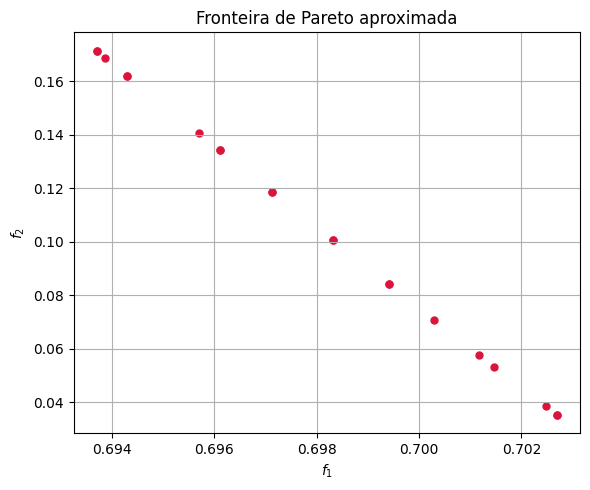

In [33]:
# %% 9 — Plots
# Fronteira aproximada
F = np.array([ind.fitness.values for ind in pareto_pop])
plt.figure(figsize=(6,5))
plt.scatter(F[:,0], F[:,1], s=25, c="crimson")
plt.title("Fronteira de Pareto aproximada")
plt.xlabel("$f_1$"); plt.ylabel("$f_2$")
plt.grid(True); plt.tight_layout(); plt.show()


In [ ]:
# === Parâmetros ótimos da solução ===
capacidade_otima = 996.53
pot_motor_var = 10.9025

# === Parâmetros fixos dos motores ===
nome_motor_fixo = "Motor D"
pot_motor_fixo = 75.0
nome_motor_variavel = "Motor B"

# === Simular microrrede ===
resultado_otimo = simular_microrrede(
    pot, carga, capacidade_otima,
   df_consumo,
    pot_motor_variavel=pot_motor_var,
    nome_motor_fixo=nome_motor_fixo,
    pot_motor_fixo=75,
    nome_motor_variavel=nome_motor_variavel
)

# === Parâmetros financeiros ===
taxa = 0.08
n = 25
vida_bat = 10

capex_solar = 20 * 550 * 24 * 1.85
capex_bat = capacidade_otima * 2.4
capex_total = capex_solar + capex_bat

energia_util = (
    resultado_otimo["energia_suprida_bateria"].sum() +
    resultado_otimo["energia_comprada_rede"].sum() +
    resultado_otimo["energia_suprida_gerador_fixo"].sum() +
    resultado_otimo["energia_suprida_gerador_var"].sum()
)

# === Fluxos anuais ===
fluxo_reposicoes = [capex_bat if ano % vida_bat == 0 else 0 for ano in range(1, n + 1)]
fluxo_opex = [0.02 * capex_bat + 0.02 * capex_solar] * n
fluxo_rede = [(resultado_otimo["custo_compra_rede"].sum() - resultado_otimo["credito_geracao_excedente"].sum())] * n
fluxo_demanda = [resultado_otimo["custo_demanda"]] * n
fluxo_combustivel = [resultado_otimo["custo_combustivel_anual"]] * n

# === Salvage
ultimo_ano_reposicao = max([ano for ano in range(vida_bat, n+1, vida_bat) if ano <= n], default=0)
vida_restante = vida_bat - (n - ultimo_ano_reposicao)
salvage = capex_bat * (vida_restante / vida_bat) if vida_restante > 0 else 0
fluxo_salvage = [0] * (n - 1) + [-salvage]

# === Fluxo total anual (anos 1 a n)
fluxo_total_anos_1_a_n = [a + b + c + d + e + f for a, b, c, d, e, f in zip(
    fluxo_reposicoes, fluxo_opex, fluxo_rede, fluxo_demanda, fluxo_combustivel, fluxo_salvage)]

# === Inserir CAPEX no ano zero
fluxo_total = [capex_total] + fluxo_total_anos_1_a_n

# === Fluxo descontado (ano 0 incluso)
fluxo_total_descontado = [f / ((1 + taxa) ** ano) for ano, f in enumerate(fluxo_total)]

# === CRF e LCOE
crf = (taxa * (1 + taxa) ** n) / ((1 + taxa) ** n - 1)
vpl_total = sum(fluxo_total_descontado)
custo_anualizado = vpl_total * crf
lcoe_final = custo_anualizado / energia_util

# === Tabela de detalhes do LCOE
df_lcoe = pd.DataFrame({
    "Categoria": [
        "CAPEX",
        "VPL Reposições",
        "VPL OPEX",
        "VPL Rede (compra - crédito)",
        "VPL Demanda",
        "VPL Combustível",
        "Valor Residual (salvage)",
        "VPL Total",
        "Custo Anualizado",
        "Energia útil total [kWh]",
        "LCOE [R$/kWh]"
    ],
    "Valor [R$]": [
        capex_total,
        sum([f / ((1 + taxa) ** (i + 1)) for i, f in enumerate(fluxo_reposicoes)]),
        sum([f / ((1 + taxa) ** (i + 1)) for i, f in enumerate(fluxo_opex)]),
        sum([f / ((1 + taxa) ** (i + 1)) for i, f in enumerate(fluxo_rede)]),
        sum([f / ((1 + taxa) ** (i + 1)) for i, f in enumerate(fluxo_demanda)]),
        sum([f / ((1 + taxa) ** (i + 1)) for i, f in enumerate(fluxo_combustivel)]),
        -salvage / ((1 + taxa) ** n),
        vpl_total,
        custo_anualizado,
        energia_util,
        lcoe_final
    ]
})

# === Fluxo de caixa anual detalhado (com ano 0)
df_fluxo_anual = pd.DataFrame({
    "Ano": list(range(0, n + 1)),
    "Reposição [R$]": [0] + fluxo_reposicoes,
    "OPEX [R$]": [0] + fluxo_opex,
    "Rede líquida [R$]": [0] + fluxo_rede,
    "Demanda [R$]": [0] + fluxo_demanda,
    "Combustível [R$]": [0] + fluxo_combustivel,
    "Salvage [R$]": [0] + fluxo_salvage,
    "Total anual [R$]": fluxo_total,
    "Total descontado [R$]": fluxo_total_descontado
})

df_fluxos = pd.DataFrame({
    "SOC [%]": resultado_otimo["soc"],
    "Potência FV [kW]": pot,
    "Carga [kW]": carga,
    "Energia FV gerada [kWh]": pot,
    "Energia suprida pela bateria [kWh]": resultado_otimo["energia_suprida_bateria"],
    "Energia comprada da rede [kWh]": resultado_otimo["energia_comprada_rede"],
    "Energia injetada da solar [kWh]": resultado_otimo["energia_injetada_solar"],
    "Energia motor fixo [kWh]": resultado_otimo["energia_suprida_gerador_fixo"],      # CORRETO
    "Energia motor variável [kWh]": resultado_otimo["energia_suprida_gerador_var"],  # CORRETO
    "Custo da compra de energia [R$]": resultado_otimo["custo_compra_rede"],
    "Crédito por injeção excedente [R$]": resultado_otimo["credito_geracao_excedente"],
}, index=pot.index)


df_fluxos["Capacidade da bateria [kWh]"] = ""
df_fluxos.loc[df_fluxos.index[0], "Capacidade da bateria [kWh]"] = capacidade_otima

# === Construir DataFrame resumo com custos fixos
custo_total_demanda = resultado_otimo["custo_demanda"]
custo_demanda_contratada = 38.61 * 100 * 12
custo_ultrapassagem = custo_total_demanda - custo_demanda_contratada

df_resumo = pd.DataFrame({
    "Custo de demanda contratada [R$/ano]": [custo_demanda_contratada],
    "Custo de ultrapassagem [R$/ano]": [custo_ultrapassagem],
    "Custo total de demanda [R$/ano]": [custo_total_demanda],
})

# === Salvar em planilha Excel
with pd.ExcelWriter("fluxos_microrrede.xlsx") as writer:
    df_fluxos.to_excel(writer, sheet_name="Fluxo Horário")
    df_resumo.to_excel(writer, sheet_name="Totais e Custos", index=False)
    df_lcoe.to_excel(writer, sheet_name="LCOE Detalhado", index=False)
    df_fluxo_anual.to_excel(writer, sheet_name="Fluxo de Caixa Anual", index=False)

print("Planilha 'fluxos_microrrede.xlsx' gerada com sucesso.")


Planilha 'fluxos_microrrede.xlsx' gerada com sucesso.
